In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [11]:
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start ,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [12]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [13]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


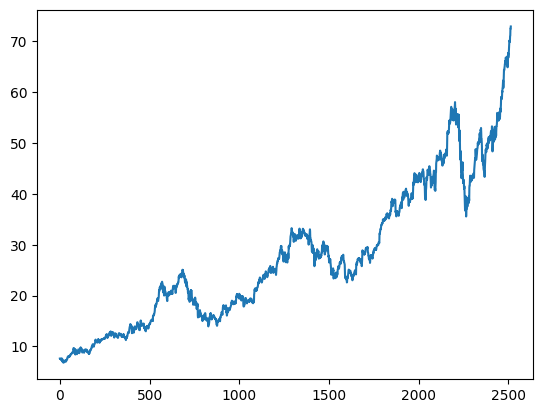

In [14]:
#graph of closing price of apple stock
plt.plot(df.Close)

In [15]:
ma100= df.Close.rolling(100).mean()
ma100 #moving avg of 100 days

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

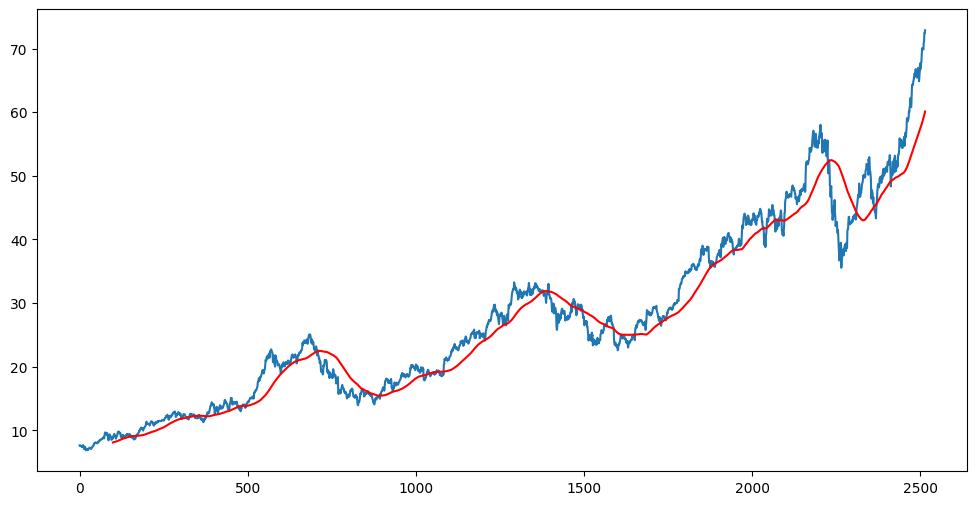

In [16]:
#plot ma of closing price
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

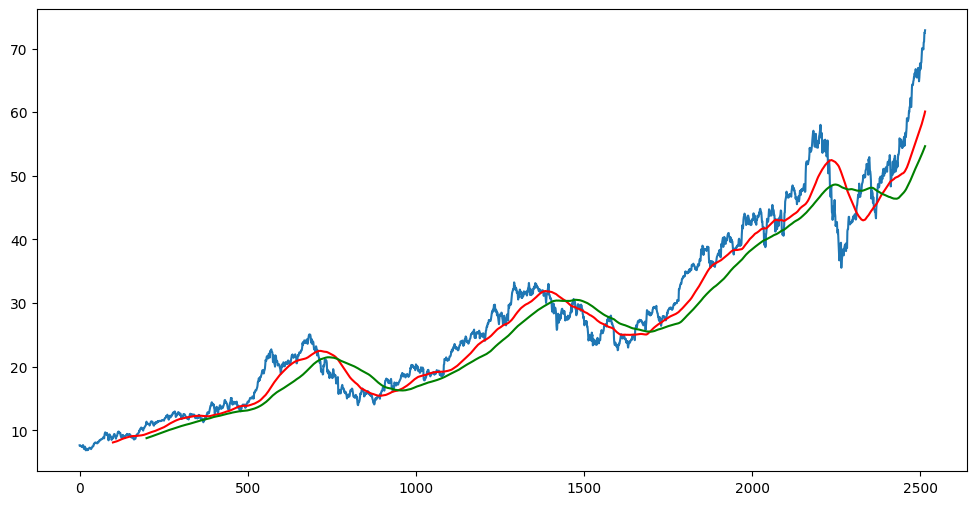

In [18]:
#plotting both ma100 and ma200on closing prices
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(2515, 5)

In [25]:
#splitting data into train and test
train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])#going till 70% of the tot vals
test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))]) #goign till complete length
print(train.shape)
print(test.shape)

(1760, 1)
(755, 1)


In [26]:
train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [27]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [82]:
#scaling data btw 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [83]:
train_arr=scaler.fit_transform(train)
train_arr

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [32]:
x_train=[]
y_train=[]

for i in range(100, train_arr.shape[0]):
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])

#converting it to numpy arr to be able to use data in LSTM model
x_train,y_train = np.array(x_train),np.array(y_train) 

In [84]:
x_train.shape

(1660, 100, 1)

In [ ]:
#ml model

In [33]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, 
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [36]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [37]:
#compiling model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

52/52 [==============================] - 34s 386ms/step - loss: 0.0654
Epoch 2/50
52/52 [==============================] - 20s 391ms/step - loss: 0.0137
Epoch 3/50
52/52 [==============================] - 19s 356ms/step - loss: 0.0121
Epoch 4/50
52/52 [==============================] - 10s 187ms/step - loss: 0.0094
Epoch 5/50
52/52 [==============================] - 10s 190ms/step - loss: 0.0113
Epoch 6/50
52/52 [==============================] - 11s 211ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0084
Epoch 8/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0077
Epoch 9/50
52/52 [==============================] - 13s 240ms/step - loss: 0.0073
Epoch 10/50
52/52 [==============================] - 11s 208ms/step - loss: 0.0070
Epoch 11/50
52/52 [==============================] - 12s 239ms/step - loss: 0.0065
Epoch 12/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0071
Epoch 13/50

In [38]:
model.save('keras_model.h5')

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
test.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [86]:
train.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [87]:
past_100_days = train.tail(100)

In [88]:
final_df = past_100_days.append(test,ignore_index=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_19228\2865996577.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test,ignore_index=True)


In [89]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [116]:
input_data = scaler.fit_transform(final_df)
input_data

array([[-1.66674341e+00],
       [-1.65558446e+00],
       [-1.67612726e+00],
       [-1.67790256e+00],
       [-1.67156217e+00],
       [-1.63859207e+00],
       [-1.64112838e+00],
       [-1.64518613e+00],
       [-1.64873673e+00],
       [-1.64163553e+00],
       [-1.66319281e+00],
       [-1.65456998e+00],
       [-1.67536644e+00],
       [-1.68703273e+00],
       [-1.70301044e+00],
       [-1.70605390e+00],
       [-1.72685036e+00],
       [-1.72431425e+00],
       [-1.70833634e+00],
       [-1.68297479e+00],
       [-1.68373580e+00],
       [-1.66699708e+00],
       [-1.73902399e+00],
       [-1.79963809e+00],
       [-1.74105277e+00],
       [-1.67739541e+00],
       [-1.58051429e+00],
       [-1.48414031e+00],
       [-1.50062535e+00],
       [-1.53460974e+00],
       [-1.53486341e+00],
       [-1.53537056e+00],
       [-1.50823370e+00],
       [-1.55667436e+00],
       [-1.55236295e+00],
       [-1.54703704e+00],
       [-1.52522609e+00],
       [-1.57011596e+00],
       [-1.5

In [92]:
input_data.shape

(855, 1)

In [101]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [102]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [103]:
#making predictions
y_pred=model.predict(x_test)

24/24 [==============================] - 1s 57ms/step


In [104]:
y_pred.shape

(755, 1)

In [105]:
y_test

array([-1.45472081e+00, -1.47779992e+00, -1.46943056e+00, -1.47272768e+00,
       -1.45776427e+00, -1.42479417e+00, -1.39740384e+00, -1.39436038e+00,
       -1.37812901e+00, -1.39080978e+00, -1.39613569e+00, -1.37178862e+00,
       -1.37204229e+00, -1.37736819e+00, -1.37178862e+00, -1.36975965e+00,
       -1.37254943e+00, -1.32410897e+00, -1.32258714e+00, -1.32233367e+00,
       -1.33044936e+00, -1.33755056e+00, -1.14987503e+00, -1.15545460e+00,
       -1.14150567e+00, -1.11081841e+00, -1.07936994e+00, -1.06643569e+00,
       -1.05679817e+00, -1.06440672e+00, -1.03473375e+00, -9.90857980e-01,
       -9.78431066e-01, -9.82488621e-01, -9.73104970e-01, -9.48250756e-01,
       -9.37852426e-01, -9.52562174e-01, -9.49265048e-01, -9.42417707e-01,
       -9.40895689e-01, -8.69883650e-01, -8.90933398e-01, -8.70137126e-01,
       -8.81296271e-01, -8.76730990e-01, -8.89919106e-01, -8.98034989e-01,
       -8.86368504e-01, -8.84846873e-01, -8.90172583e-01, -8.52891068e-01,
       -8.47058019e-01, -

In [106]:
y_pred

array([[0.13346751],
       [0.1402805 ],
       [0.14178082],
       [0.1371083 ],
       [0.13089253],
       [0.12466674],
       [0.11990944],
       [0.11846156],
       [0.11872415],
       [0.12069595],
       [0.12328912],
       [0.12189971],
       [0.12541273],
       [0.12816286],
       [0.12971002],
       [0.13178068],
       [0.1377806 ],
       [0.1407888 ],
       [0.14520188],
       [0.13706215],
       [0.14053372],
       [0.1367752 ],
       [0.14258285],
       [0.14933178],
       [0.1443482 ],
       [0.14260782],
       [0.14414053],
       [0.13655284],
       [0.12443921],
       [0.11782154],
       [0.1130098 ],
       [0.1109257 ],
       [0.11352111],
       [0.11722456],
       [0.11915424],
       [0.12034217],
       [0.12048741],
       [0.11901632],
       [0.11849982],
       [0.11946492],
       [0.11780776],
       [0.11442612],
       [0.11320576],
       [0.1120481 ],
       [0.11128822],
       [0.10956609],
       [0.10838491],
       [0.109

In [107]:
scaler.scale_

array([9.85744042])

In [114]:
scale_factor=1/9.85744042
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor


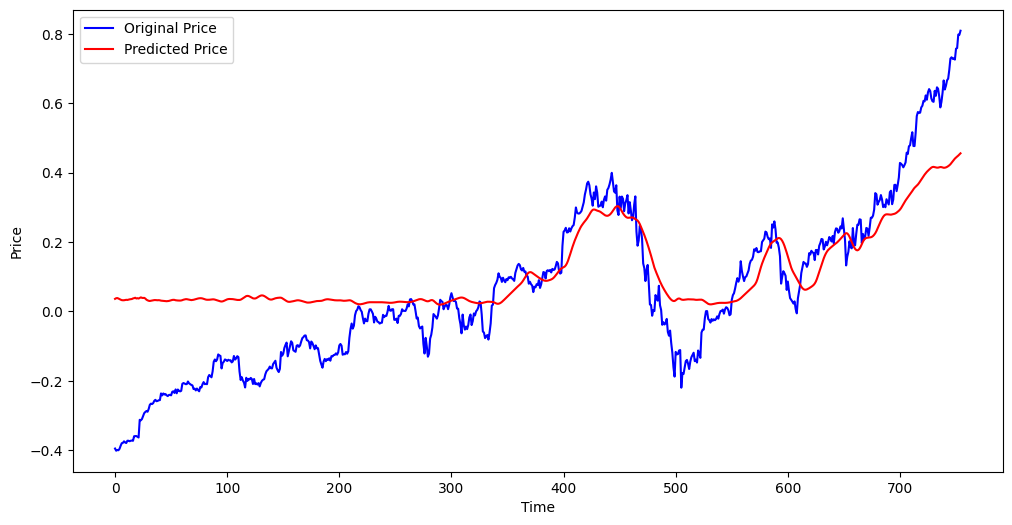

In [115]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_pred, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()